# Simple Face and Eyes Detection

The mini project is actually just a demonstration of how to detect faces and eyes in images using pretrained Haar feature-based cascade classifiers.

The pictures were collected from Google Images.

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

## 1 Data load

In [2]:
# The pretrained classifiers are stored as XML files.
haar_face_xml = os.path.join('classifiers', 'haarcascade_frontalface_default.xml')
haar_eye_xml = os.path.join('classifiers', 'haarcascade_eye.xml')

In [3]:
# Load the classifiers for faces and eyes.
clf_face = cv2.CascadeClassifier(haar_face_xml)
clf_eye = cv2.CascadeClassifier(haar_eye_xml)

In [4]:
# Get the image files that will be processed.
im_files = sorted(os.listdir('images'))
im_files

['00.png', '01.png', '02.jpg', '04.png', '05.jpg']

In [5]:
# Read all images into a list.
im_list = []
for f in im_files:
    im_list.append(cv2.imread(os.path.join('images', f)))

## 2 Detection and Results

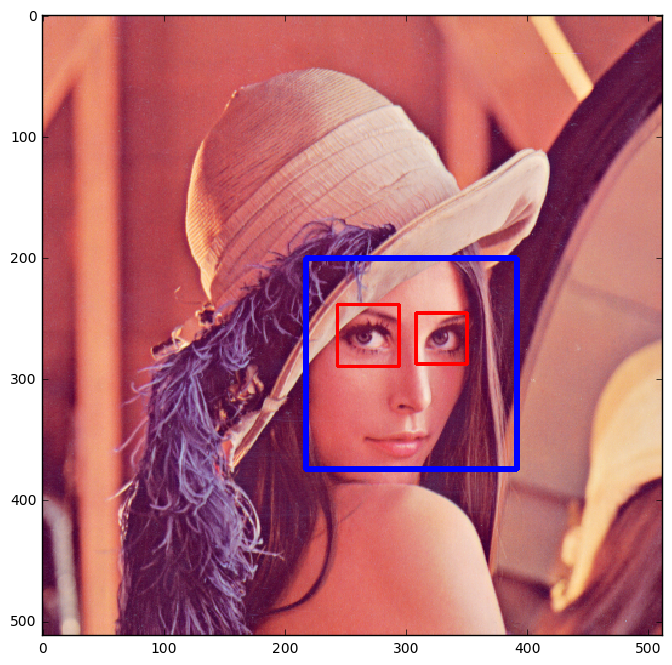

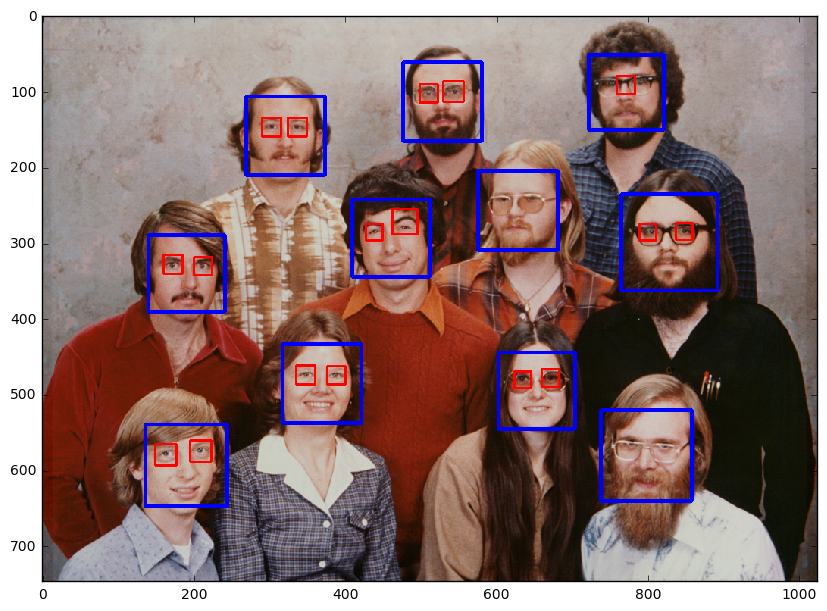

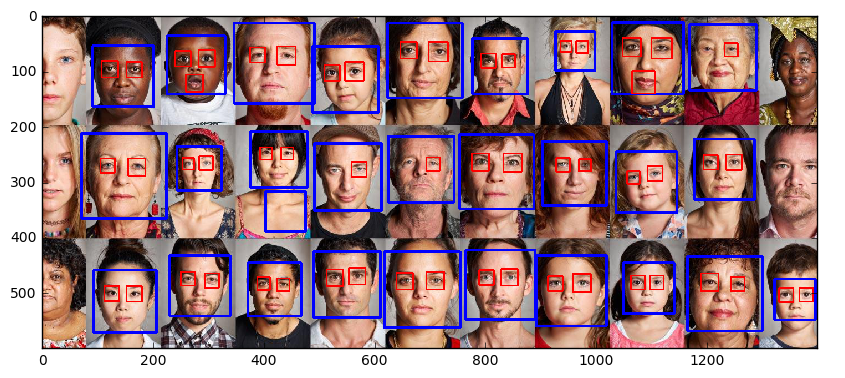

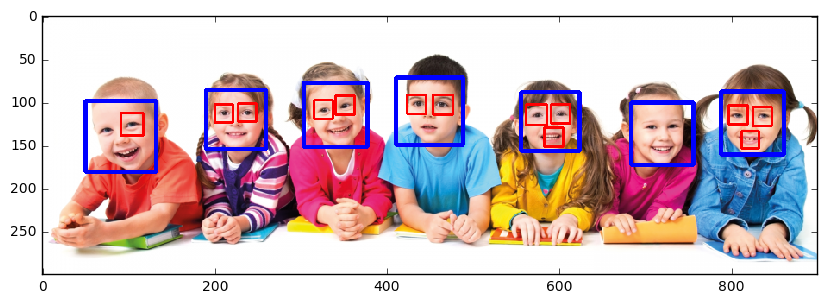

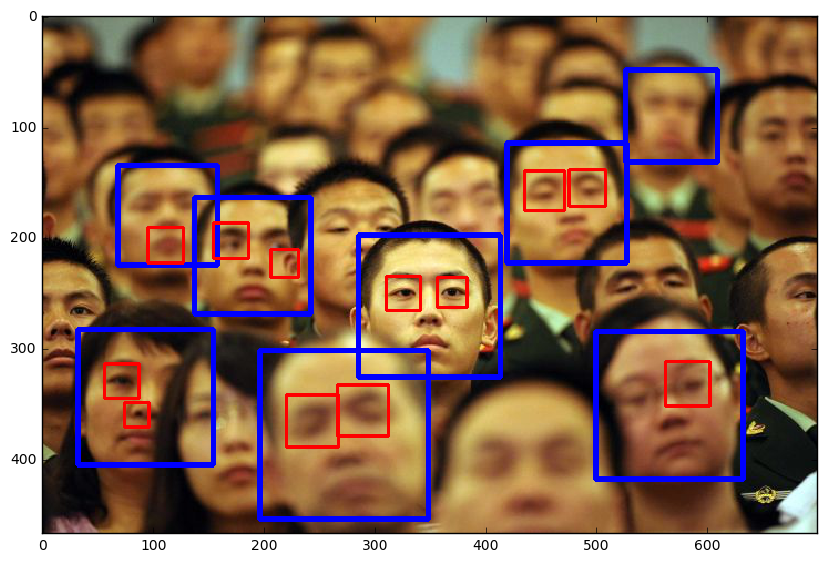

In [6]:
for im_color in im_list:
    # Convert image to grayscale.
    im_gray = cv2.cvtColor(im_color, cv2.COLOR_BGR2GRAY)

    # Detect faces of multiple sizes.
    faces = clf_face.detectMultiScale(im_gray, scaleFactor=1.1, minNeighbors=10)

    for fx, fy, fw, fh in faces:
        # Draw a rectangle delimiting the face.
        cv2.rectangle(im_color, (fx, fy), (fx + fw, fy + fh), (255, 0, 0), 3)

        # Get the regions of interest (ROI) of each face.
        roi_color = im_color[fy:fy + fh, fx:fx + fw]
        roi_gray = im_gray[fy:fy + fh, fx:fx + fw]

        # Detect eyes inside the face ROI.
        eyes = clf_eye.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3)

        for ex, ey, ew, eh in eyes:
            # Draw a rectangle delimiting each eye.
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)

    # Show the results.
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(im_color, cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.show()